# MAKİNE ÖĞRENMESİ MODELLERİ İLE TÜRKİYE COVID19 VAKA TAHMİNLEMESİ

In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import csv

# Güncel Veri Çekme

In [2]:
%%time
tarih=[]
toplam_test=[]
toplam_vaka=[]
toplam_vefat=[]
pneumonia=[]
agir_hasta=[]
iyilesen=[]
bugun_vaka=[]
bugun_hasta=[]
bugun_test=[]
bugun_vefat=[]
bugun_iyilesen=[]


#options = webdriver.ChromeOptions()
#options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
#chrome_driver_binary = r"C:\Users\Nafiz\Python\chromedriver_win32\chromedriver.exe"
#driver = webdriver.Chrome(chrome_driver_binary, options=options)
driver = webdriver.Chrome(ChromeDriverManager().install())

base_url = str("https://covid19.saglik.gov.tr/TR-66935/genel-koronavirus-tablosu.html")
driver.get(base_url)

rows = 1 + len(driver.find_elements_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr"))


tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.XPATH,"//*[@id='TumVerileriGetir']")))

for table in tables:

    for r in range(1, rows):
        
        tarih.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[1]").get_attribute('textContent').strip())

        toplam_test.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[2]").get_attribute('textContent').strip())

        toplam_vaka.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[3]").get_attribute('textContent').strip())
        
        toplam_vefat.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[4]").get_attribute('textContent').strip())
        
        pneumonia.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[5]").get_attribute('textContent').strip())
        
        agir_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[6]").get_attribute('textContent').strip())
        
        iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[7]").get_attribute('textContent').strip())
        
        bugun_vaka.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[8]").get_attribute('textContent').strip())
        
        bugun_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[9]").get_attribute('textContent').strip())
        
        bugun_test.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[10]").get_attribute('textContent').strip())
        
        bugun_vefat.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[11]").get_attribute('textContent').strip())
        
        bugun_iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[12]").get_attribute('textContent').strip())



df = pd.DataFrame({"Tarih":tarih, 
                   "Toplam Test Sayısı":toplam_test, 
                   "Toplam Vaka Sayısı":toplam_vaka, 
                   "Toplam Vefat Sayısı":toplam_vefat,
                   "Hastalarda Zatürre Oranı (%)":pneumonia, 
                   "Ağır Hasta Sayısı":agir_hasta, 
                   "Toplam İyileşen Hasta Sayısı": iyilesen, 
                   "Bugünkü Vaka Sayısı": bugun_vaka,
                   "Bugünkü Hasta Sayısı":bugun_hasta, 
                   "Bugünkü Test Sayısı":bugun_test, 
                   "Bugünkü Vefat Sayısı":bugun_vefat, 
                   "Bugünkü İyileşen Sayısı":bugun_iyilesen})



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Get LATEST driver version for 90.0.4430
Trying to download new driver from https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Nafiz\.wdm\drivers\chromedriver\win32\90.0.4430.24]


Wall time: 2min


In [3]:
df.to_excel("covid19_data.xlsx", index=False, encoding="utf-8-sig")

In [4]:
csv = 'covid19_data.xlsx'
covid_tr = pd.read_excel(csv, thousands=".")
df = covid_tr.copy()    

# Veri İnceleme

In [5]:
df.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,9 MAYIS 2021,49390141.0,5031332,43029.0,"3,2",3081.0,4716918.0,15191.0,2102.0,197468.0,283.0,25694.0
1,8 MAYIS 2021,49192673.0,5016141,42746.0,"3,2",3175.0,4691224.0,18052.0,2178.0,228873.0,281.0,28896.0
2,7 MAYIS 2021,48963800.0,4998089,42465.0,"3,2",3260.0,4662328.0,20107.0,2210.0,251194.0,278.0,35529.0
3,6 MAYIS 2021,48712606.0,4977982,42187.0,"3,2",3378.0,4626799.0,22388.0,2401.0,253382.0,304.0,37298.0
4,5 MAYIS 2021,48459224.0,4955594,41883.0,"3,2",3418.0,4589501.0,26476.0,2414.0,229491.0,356.0,35464.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         425 non-null    object 
 1   Toplam Test Sayısı            409 non-null    float64
 2   Toplam Vaka Sayısı            425 non-null    int64  
 3   Toplam Vefat Sayısı           419 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  285 non-null    object 
 5   Ağır Hasta Sayısı             285 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  409 non-null    float64
 7   Bugünkü Vaka Sayısı           166 non-null    float64
 8   Bugünkü Hasta Sayısı          409 non-null    float64
 9   Bugünkü Test Sayısı           409 non-null    float64
 10  Bugünkü Vefat Sayısı          409 non-null    float64
 11  Bugünkü İyileşen Sayısı       401 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 40.0+ KB


In [7]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı               16
Toplam Vaka Sayısı                0
Toplam Vefat Sayısı               6
Hastalarda Zatürre Oranı (%)    140
Ağır Hasta Sayısı               140
Toplam İyileşen Hasta Sayısı     16
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı             16
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

# Data Tipi Değiştirme ve Eksik Verileri Doldurma

In [8]:
df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].fillna(0).astype(int)
df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].fillna(0).astype(int)

df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].fillna(0).astype(int)

df["Hastalarda Zatürre Oranı (%)"] = df["Hastalarda Zatürre Oranı (%)"].str.replace(',', '.', regex=True).fillna(0).astype(float)

df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].fillna(0).astype(int)

df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].fillna(0).astype(int)

df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].fillna(0).astype(int)
df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].fillna(0).astype(int)
df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].fillna(0).astype(int)
df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].fillna(0).astype(int)
df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].fillna(0).astype(int)

## Tarih

In [9]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"].loc[i] = df["Tarih"].loc[i].replace(months["monthStr"][k], months["monthInt"][k])

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [11]:
df = df[::-1].reset_index(drop=True)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')

df['Tarih'] = pd.to_datetime(df['Tarih']).dt.date

## Günlük Vaka Sayısı Doldurulması

In [12]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"].loc[i] = 1
    else:
        a = df["Toplam Vaka Sayısı"].loc[i+1] - df["Toplam Vaka Sayısı"].loc[i]
        df["Bugünkü Vaka Sayısı"].loc[i+1] = a

In [13]:
df.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0


# Görselleştirmeler

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter

In [15]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

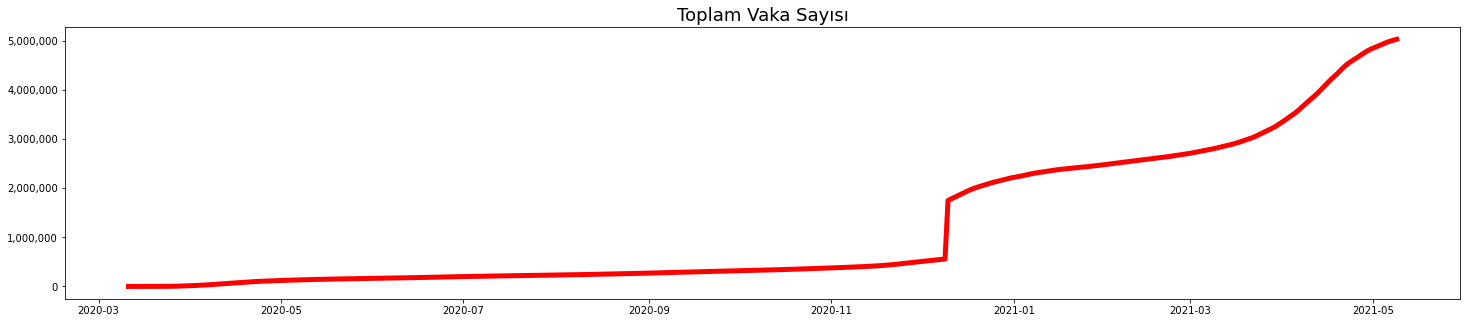

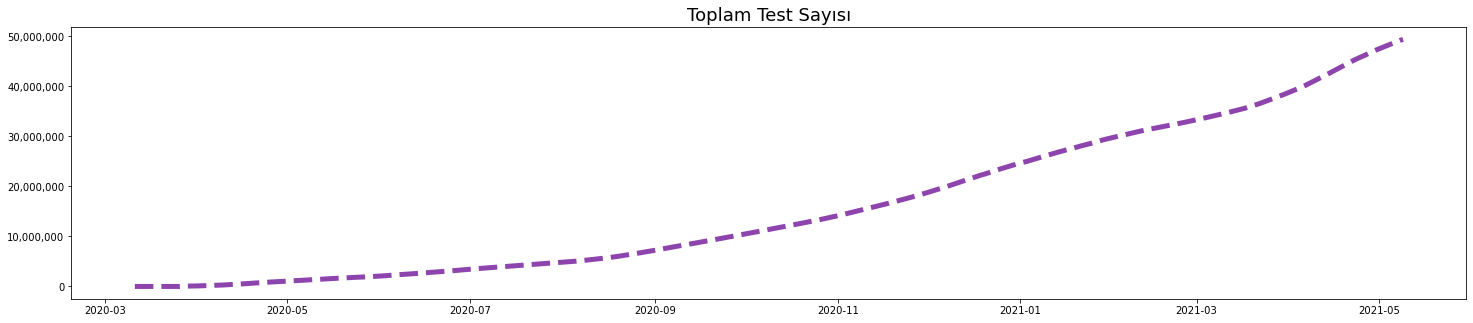

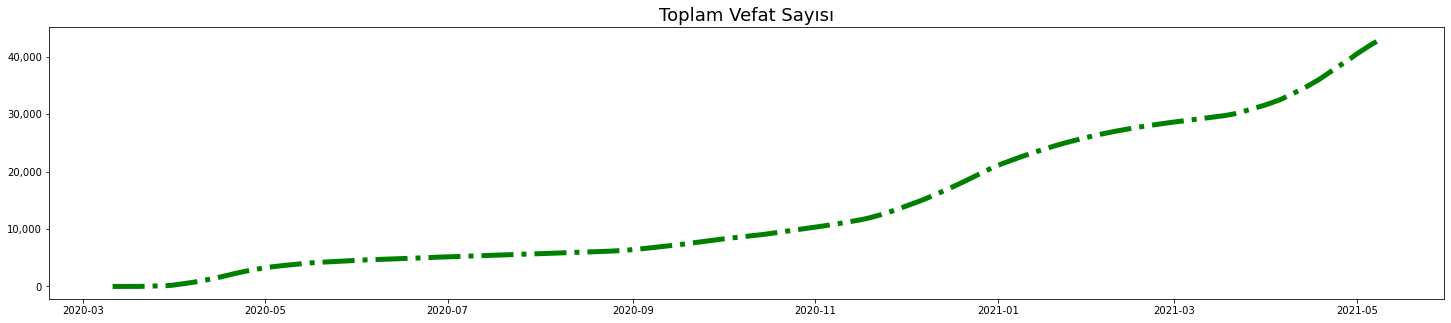

In [16]:
list_select=["Toplam Vaka Sayısı", "Toplam Test Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Test Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Test Sayısı"],"--",lw=5,color="#8E44AD")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")

# MODELLER

## SARIMAX

In [17]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [18]:
print("Bugünkü Vaka Sayısı")
print(testStationarity(new_df["Bugünkü Vaka Sayısı"]))

print("Bugünkü Hasta Sayısı")
print(testStationarity(new_df["Bugünkü Hasta Sayısı"]))

print("Bugünkü Vefat Sayısı")
print(testStationarity(new_df["Bugünkü Vefat Sayısı"]))

Bugünkü Vaka Sayısı
Test Statistic                  -2.702910
p-value                          0.073536
#Lags Used                      16.000000
Number of Observations Used    408.000000
Critical Value (1%)             -3.446480
Critical Value (5%)             -2.868650
Critical Value (10%)            -2.570557
dtype: float64
Bugünkü Hasta Sayısı
Test Statistic                  -2.839913
p-value                          0.052795
#Lags Used                      18.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576
dtype: float64
Bugünkü Vefat Sayısı
Test Statistic                  -2.575728
p-value                          0.098118
#Lags Used                      18.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576
dtype: float64


In [19]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.964203,0.994000,-0.137693,0.604082,0.963208,0.752303,0.058850,0.897372,0.760834,0.758577
Toplam Vaka Sayısı,0.964203,1.000000,0.979007,-0.246437,0.485512,0.996926,0.753913,-0.034032,0.828349,0.771948,0.828851
Toplam Vefat Sayısı,0.994000,0.979007,1.000000,-0.181843,0.545525,0.980059,0.732103,0.001479,0.864427,0.742961,0.761280
Hastalarda Zatürre Oranı (%),-0.137693,-0.246437,-0.181843,1.000000,0.001473,-0.243536,-0.241733,-0.075560,-0.007507,-0.185516,-0.221974
Ağır Hasta Sayısı,0.604082,0.485512,0.545525,0.001473,1.000000,0.464328,0.628339,0.643383,0.785832,0.782863,0.528661
Toplam İyileşen Hasta Sayısı,0.963208,0.996926,0.980059,-0.243536,0.464328,1.000000,0.720262,-0.069138,0.809600,0.747405,0.807194
Bugünkü Vaka Sayısı,0.752303,0.753913,0.732103,-0.241733,0.628339,0.720262,1.000000,0.384920,0.852270,0.817156,0.833378
Bugünkü Hasta Sayısı,0.058850,-0.034032,0.001479,-0.075560,0.643383,-0.069138,0.384920,1.000000,0.319500,0.498960,0.191863
Bugünkü Test Sayısı,0.897372,0.828349,0.864427,-0.007507,0.785832,0.809600,0.852270,0.319500,1.000000,0.856163,0.787285
Bugünkü Vefat Sayısı,0.760834,0.771948,0.742961,-0.185516,0.782863,0.747405,0.817156,0.498960,0.856163,1.000000,0.852326


### GÜNLÜK VAKA SAYISI

In [20]:
#!pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7623.329, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7501.457, Time=1.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7618.532, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7454.915, Time=2.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7477.364, Time=0.89 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7456.803, Time=2.90 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=7456.844, Time=3.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7456.739, Time=2.04 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=6.71 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=7456.442, Time=2.14 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


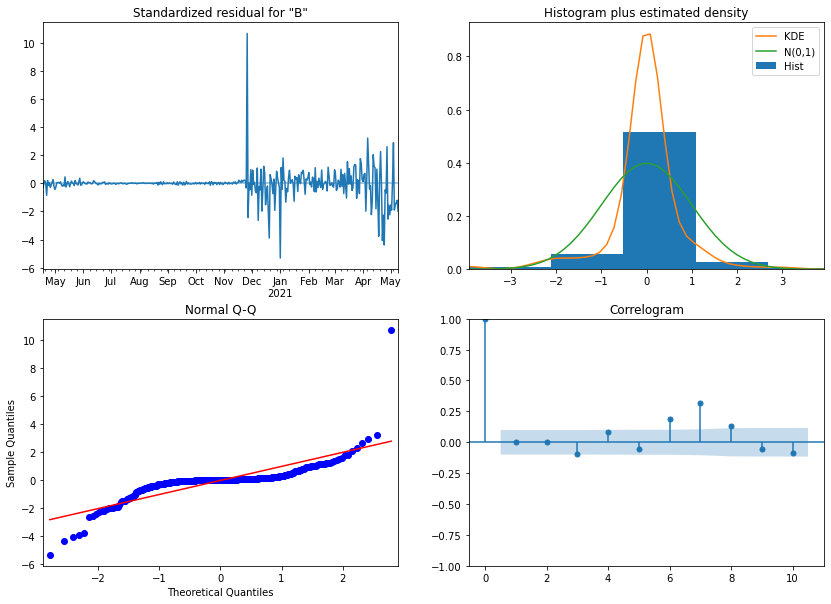

In [22]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
b_vaka_df = pd.DataFrame(b_vaka_df)

results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)


mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_vaka = mod.fit()


results_vaka.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK HASTA SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5937.596, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5802.915, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5939.593, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5758.107, Time=0.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5760.345, Time=0.73 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5756.487, Time=1.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5800.568, Time=0.44 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.52 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5757.465, Time=0.99 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5748.8

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


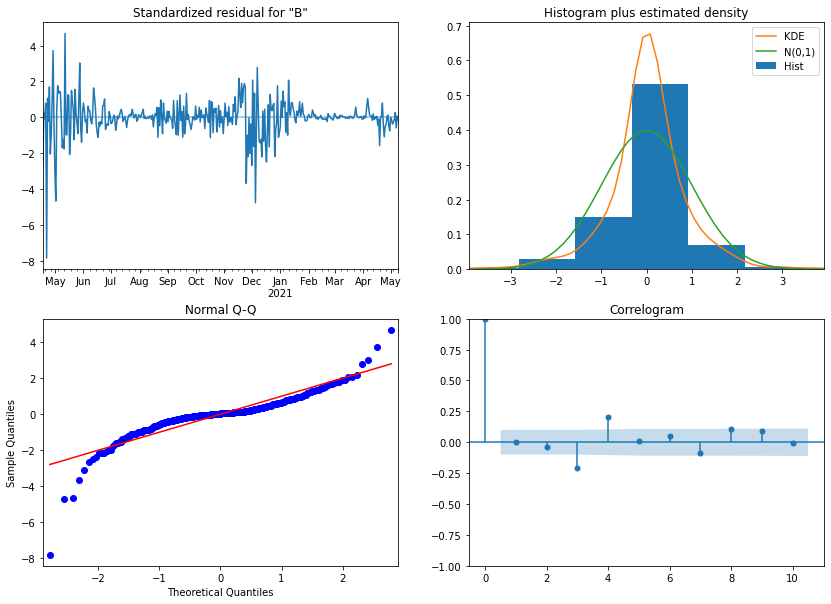

In [23]:
b_hasta_df = new_df["Bugünkü Hasta Sayısı"]
b_hasta_df = pd.DataFrame(b_hasta_df)

results = auto_arima(b_hasta_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_hasta_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_hasta = mod.fit()

results_hasta.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK VEFAT SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2905.350, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3010.918, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2974.895, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2920.846, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3012.758, Time=0.24 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.50 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2969.777, Time=0.46 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2920.117, Time=0.32 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2907.350, Time=1.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2907.350, Time=1.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2925.251, Time=0.27 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2921.351, Time=0.57 sec
 ARIMA(2,1,0)(0,1,1)[12]          

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


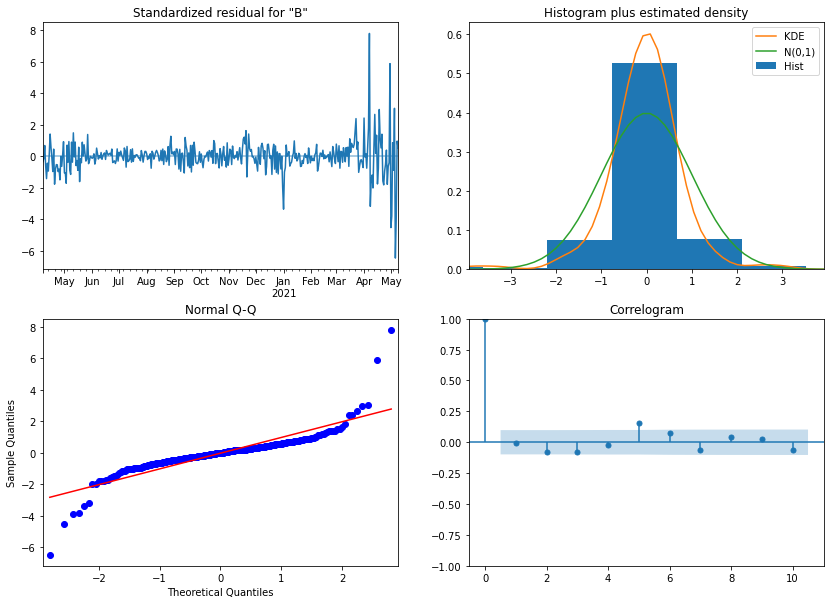

In [24]:
b_vefat_df = new_df["Bugünkü Vefat Sayısı"]
b_vefat_df = pd.DataFrame(b_vefat_df)

results = auto_arima(b_vefat_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_vefat_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_vefat = mod.fit()


results_vefat.plot_diagnostics(figsize=(14,10))
plt.show()

### GERÇEK VE ÖNGÖRÜLEN DEĞERLERİN KARŞILAŞTIRILMASI

In [25]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_prediction(start = pd.to_datetime('2020-03-11'), dynamic=False)
pred_vaka_ci = pred_vaka.conf_int()

pred_vaka_ci['Predicted'] = (pred_vaka_ci['lower Bugünkü Vaka Sayısı'] + pred_vaka_ci['upper Bugünkü Vaka Sayısı'])/2
pred_vaka_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_vaka_ci['Diff, %%'] = ((pred_vaka_ci['Predicted'] / pred_vaka_ci['Observed'])-1) * 100
pred_vaka_ci.head()

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.000000,1,-100.000000
2020-03-12,-4961.434820,4963.606145,1.085662,0,inf
2020-03-13,-4967.265097,4966.838165,-0.213466,4,-105.336659
2020-03-14,-4962.199544,4971.918248,4.859352,1,385.935201
2020-03-15,-4966.675442,4967.442373,0.383465,12,-96.804456


In [26]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_hasta_ci = pred_hasta.conf_int()

pred_hasta_ci['Predicted'] = (pred_hasta_ci['lower Bugünkü Hasta Sayısı'] + pred_hasta_ci['upper Bugünkü Hasta Sayısı'])/2
pred_hasta_ci['Observed'] = b_hasta_df['Bugünkü Hasta Sayısı']
pred_hasta_ci['Diff, %%'] = ((pred_hasta_ci['Predicted'] / pred_hasta_ci['Observed'])-1) * 100
pred_hasta_ci.head()

,lower Bugünkü Hasta Sayısı,upper Bugünkü Hasta Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-3180.714356,3180.714356,0.0,0,NaN
2020-03-13,-3158.539838,3158.539838,0.0,0,NaN
2020-03-14,-3155.432492,3155.432492,0.0,0,NaN
2020-03-15,-3154.991566,3154.991566,0.0,0,NaN


In [27]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_vefat_ci = pred_vefat.conf_int()

pred_vefat_ci['Predicted'] = (pred_vefat_ci['lower Bugünkü Vefat Sayısı'] + pred_vefat_ci['upper Bugünkü Vefat Sayısı'])/2
pred_vefat_ci['Observed'] = b_vefat_df['Bugünkü Vefat Sayısı']
pred_vefat_ci['Diff, %%'] = ((pred_vefat_ci['Predicted'] / pred_vefat_ci['Observed'])-1) * 100
pred_vefat_ci.head()

,lower Bugünkü Vefat Sayısı,upper Bugünkü Vefat Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-3155.211131,3155.211131,0.0,0,NaN
2020-03-13,-3126.712269,3126.712269,0.0,0,NaN
2020-03-14,-3122.858190,3122.858190,0.0,0,NaN
2020-03-15,-3122.328492,3122.328492,0.0,0,NaN


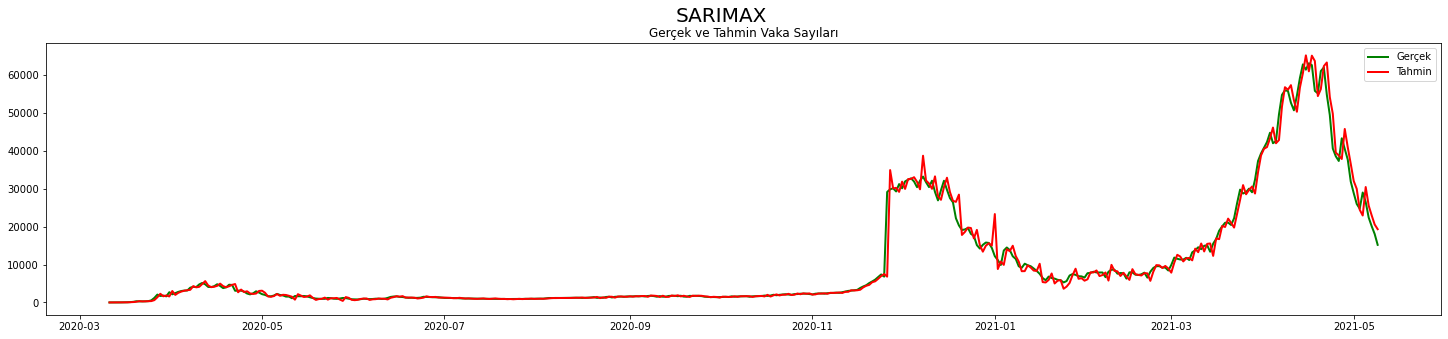

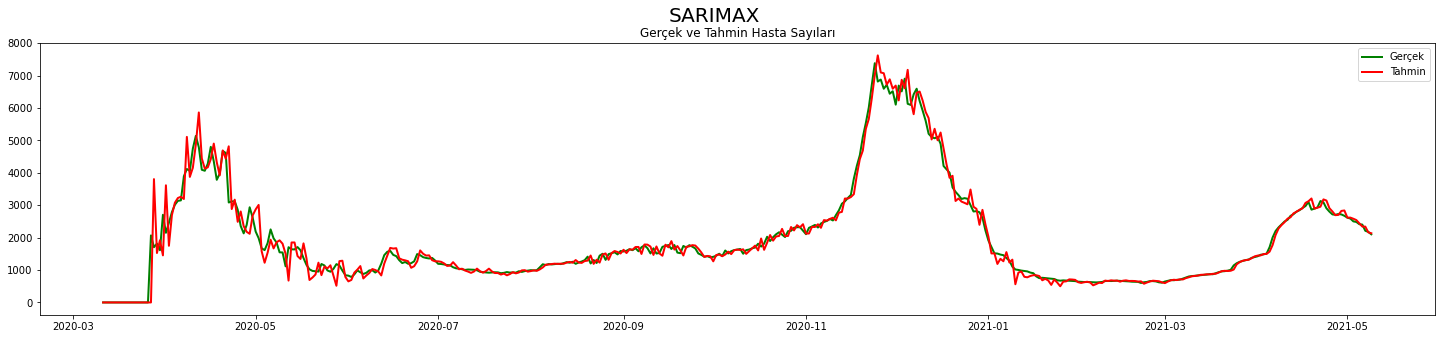

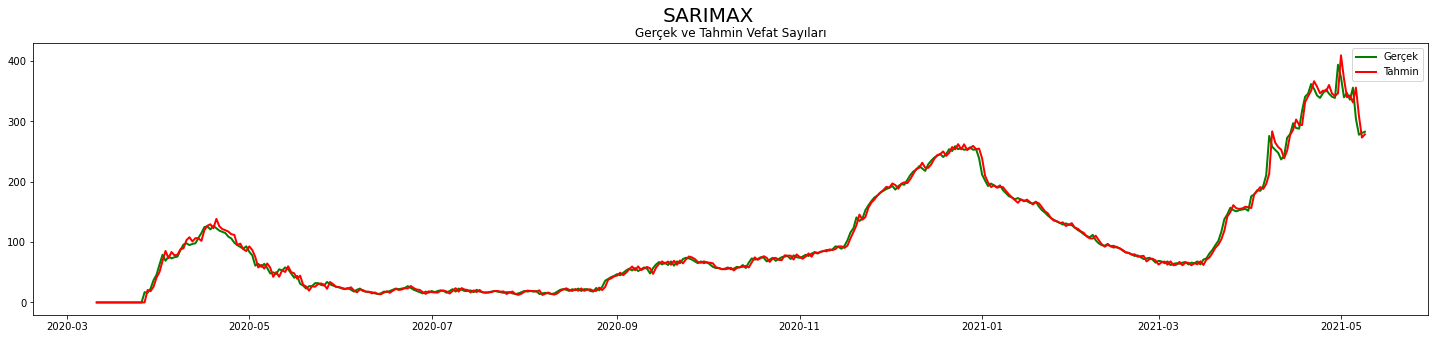

In [28]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Vaka Sayıları")
ax.plot(pred_vaka_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vaka_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/SARIMAX.png')

fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Hasta Sayıları")
ax.plot(pred_hasta_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_hasta_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Vefat Sayıları")
ax.plot(pred_vefat_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vefat_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
plt.show()

### İLERİ TARİHLİ TAHMİNLEME

In [29]:
from dateutil.relativedelta import relativedelta

In [30]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_forecast(steps=4)

value = pred_vaka.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vaka Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff_vaka = pd.concat([b_vaka_df, deneme])

In [31]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_forecast(steps=4)

value = pred_hasta.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Hasta Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Hasta Sayısı"]
dff_hasta = pd.concat([b_hasta_df, deneme])

In [32]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_forecast(steps=4)

value = pred_vefat.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vefat Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vefat Sayısı"]
dff_vefat = pd.concat([b_vefat_df, deneme])

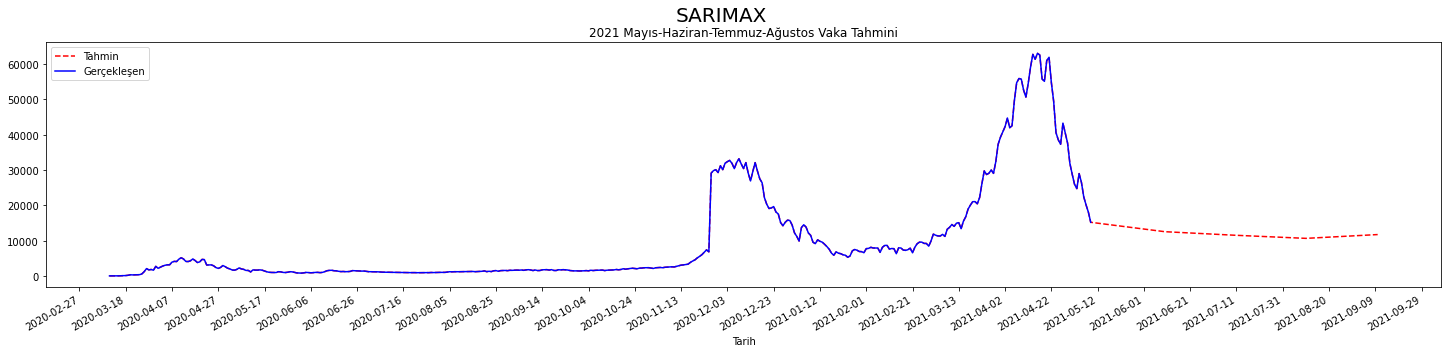

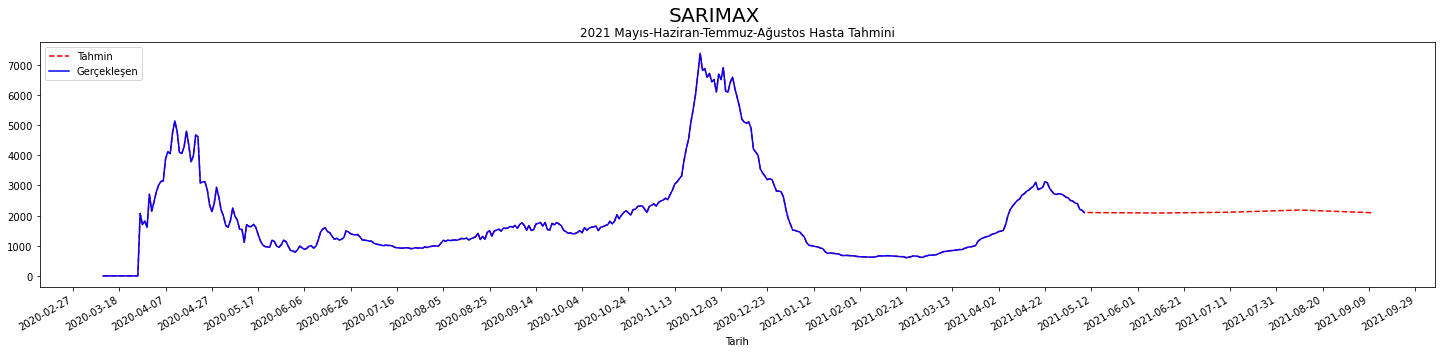

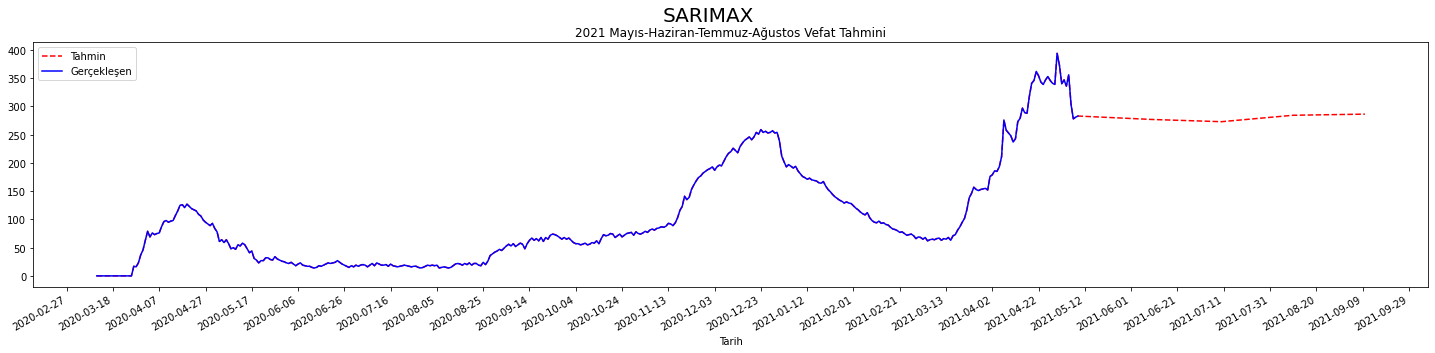

In [33]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vaka["Bugünkü Vaka Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vaka Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_hasta["Bugünkü Hasta Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Hasta Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_hasta_df["Bugünkü Hasta Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vefat["Bugünkü Vefat Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vefat Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vefat_df["Bugünkü Vefat Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

In [34]:
sarimax_rmse = np.sqrt(results_vaka.mse)
sarimax_mae = results_vaka.mae

print("RMSE :", sarimax_rmse)
print("MAE :", sarimax_mae)

RMSE : 1997.5646626365126
MAE : 874.7306673480365


## MAKİNE ÖĞRENMESİ

In [35]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [36]:
ml_df = df.copy()
ml_df['Tarih'] = pd.to_datetime(ml_df['Tarih'], format='%Y-%m-%d')
ml_df['Gün'] = ml_df['Tarih'].dt.day
ml_df['Ay'] = ml_df['Tarih'].dt.month
ml_df['Yıl'] = ml_df['Tarih'].dt.year

ml_df.index = ml_df["Tarih"]
ml_df.index = pd.DatetimeIndex(ml_df.index)
ml_df.drop(["Tarih"], axis=1, inplace=True)
ml_df.head()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Tarih,,,,,,,,,,,,,,
2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020


In [37]:
ml_df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Toplam Test Sayısı,1.000000,0.964203,0.994000,-0.137693,0.604082,0.963208,0.752303,0.058850,0.897372,0.760834,0.758577,-0.032099,-0.283994,0.877893
Toplam Vaka Sayısı,0.964203,1.000000,0.979007,-0.246437,0.485512,0.996926,0.753913,-0.034032,0.828349,0.771948,0.828851,-0.024825,-0.423627,0.899603
Toplam Vefat Sayısı,0.994000,0.979007,1.000000,-0.181843,0.545525,0.980059,0.732103,0.001479,0.864427,0.742961,0.761280,-0.035363,-0.348691,0.904812
Hastalarda Zatürre Oranı (%),-0.137693,-0.246437,-0.181843,1.000000,0.001473,-0.243536,-0.241733,-0.075560,-0.007507,-0.185516,-0.221974,-0.050433,0.438014,-0.257394
Ağır Hasta Sayısı,0.604082,0.485512,0.545525,0.001473,1.000000,0.464328,0.628339,0.643383,0.785832,0.782863,0.528661,-0.018879,0.395290,0.249415
Toplam İyileşen Hasta Sayısı,0.963208,0.996926,0.980059,-0.243536,0.464328,1.000000,0.720262,-0.069138,0.809600,0.747405,0.807194,-0.024409,-0.444064,0.912744
Bugünkü Vaka Sayısı,0.752303,0.753913,0.732103,-0.241733,0.628339,0.720262,1.000000,0.384920,0.852270,0.817156,0.833378,-0.021577,-0.091042,0.553702
Bugünkü Hasta Sayısı,0.058850,-0.034032,0.001479,-0.075560,0.643383,-0.069138,0.384920,1.000000,0.319500,0.498960,0.191863,0.000666,0.517991,-0.252554
Bugünkü Test Sayısı,0.897372,0.828349,0.864427,-0.007507,0.785832,0.809600,0.852270,0.319500,1.000000,0.856163,0.787285,-0.017838,0.028868,0.648369
Bugünkü Vefat Sayısı,0.760834,0.771948,0.742961,-0.185516,0.782863,0.747405,0.817156,0.498960,0.856163,1.000000,0.852326,0.004141,-0.021423,0.521688


In [38]:
X = ml_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y = ml_df["Bugünkü Vaka Sayısı"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
pred_vaka_ci = pred_vaka_ci[pred_vaka_ci.index.isin(y_test.index)]

### XGBOOST

In [40]:
import xgboost as xg

In [41]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [42]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
xgb_mae = mean_absolute_error(y_test, xgb_r.predict(X_test))

print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)

RMSE : 1851.3882939743235
MAE : 836.0516994700712


D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [43]:
xgb_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": xgb_r.predict(X_test)}).sort_index()
xgb_tahmin_df

D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,81.736404
2020-03-15,12,81.736404
2020-03-17,51,81.736404
2020-03-21,277,306.315613
2020-03-23,293,306.315613
...,...,...
2021-04-22,54791,59267.566406
2021-04-25,38553,33924.726562
2021-05-03,24733,30402.853516


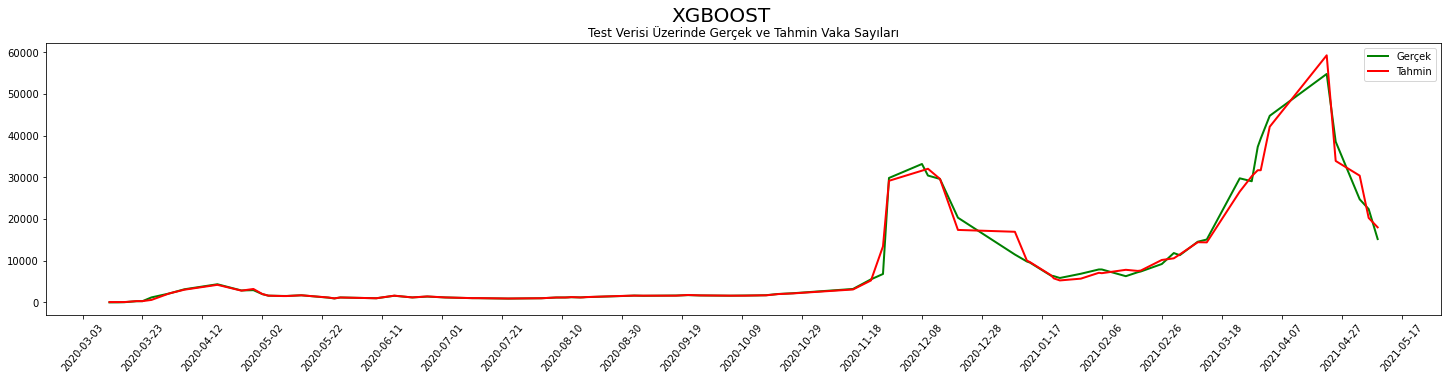

In [44]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(xgb_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(xgb_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/XGBoost.png')

### SKLEARN

In [45]:
sklearn_model = LinearRegression().fit(X_train,y_train)

In [46]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_model.predict(X_test)))
sklearn_mae = mean_absolute_error(y_test, sklearn_model.predict(X_test))

print("RMSE :", sklearn_rmse)
print("MAE :", sklearn_mae)

RMSE : 4624.933787845409
MAE : 3204.298585879803


In [47]:
sklearn_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": sklearn_model.predict(X_test)}).sort_index()
sklearn_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,-590.729602
2020-03-15,12,-1069.196010
2020-03-17,51,-1385.820357
2020-03-21,277,-1987.257402
2020-03-23,293,-2278.763525
...,...,...
2021-04-22,54791,56142.032488
2021-04-25,38553,40466.564234
2021-05-03,24733,29601.736925


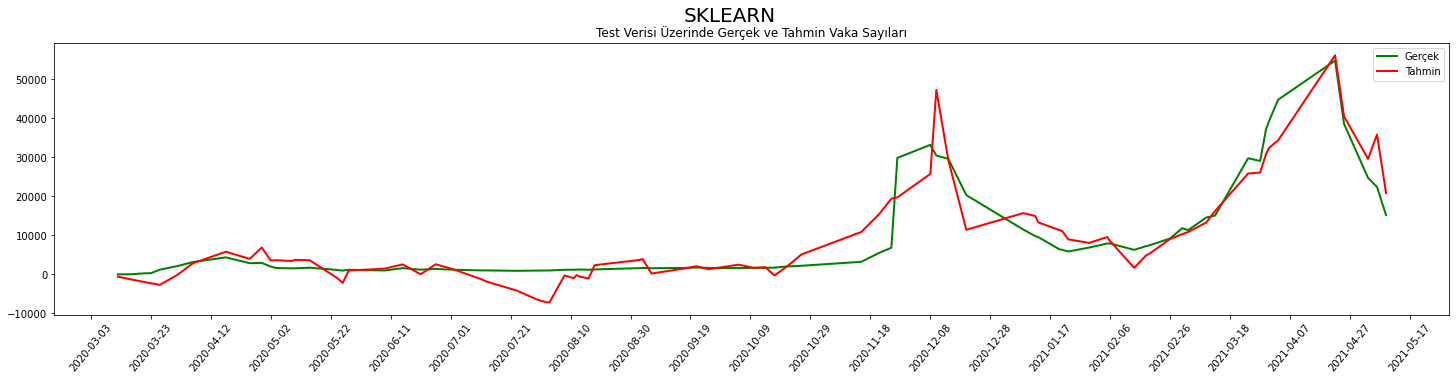

In [48]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SKLEARN', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(sklearn_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(sklearn_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Sklearn.png')

### DESICION TREE REGRESSOR

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor().fit(X_train,y_train)

In [50]:
dt_regressor_rmse = np.sqrt(mean_squared_error(y_test, dt_regressor.predict(X_test)))
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor.predict(X_test))

print("RMSE :", dt_regressor_rmse)
print("MAE :", dt_regressor_mae)

RMSE : 3120.7250062615067
MAE : 1100.4941176470588


In [51]:
dt_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": dt_regressor.predict(X_test)}).sort_index()
dt_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1.0
2020-03-15,12,1.0
2020-03-17,51,29.0
2020-03-21,277,311.0
2020-03-23,293,289.0
...,...,...
2021-04-22,54791,61967.0
2021-04-25,38553,37312.0
2021-05-03,24733,31891.0


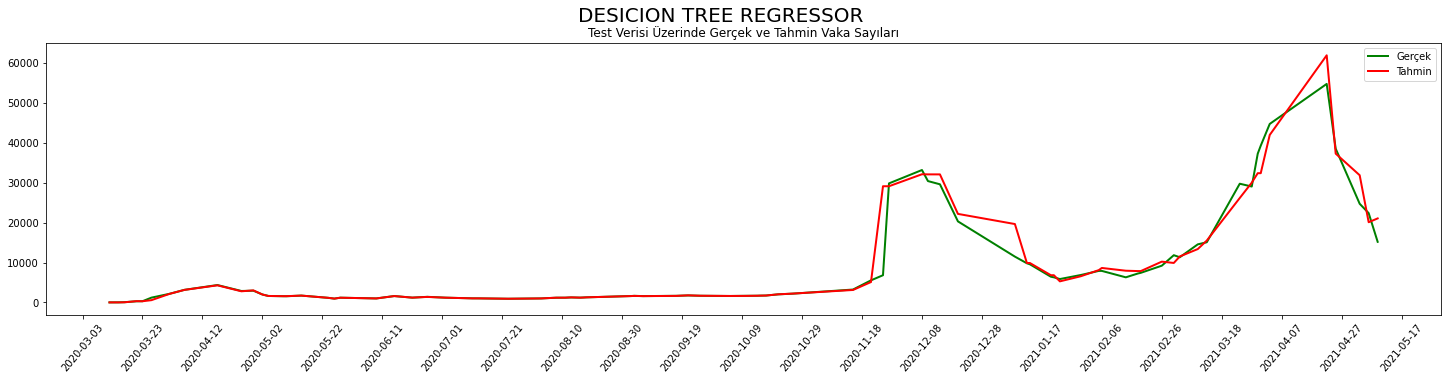

In [52]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DESICION TREE REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(dt_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(dt_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/DecisionTree.png')

### ARTIFICIAL DEEP NEURAL NETWORK

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = X_train, X_test, y_train, y_test

In [55]:
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [56]:
tf_model = Sequential()

tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))

tf_model.add(Dense(1))

tf_model.compile(optimizer = "adam", loss = "mse")

tf_model.fit(x = X_train_tf, y = y_train_tf, validation_data = (X_test_tf, y_test_tf), batch_size = 50, epochs = 500)

Epoch 1/500
7/7 [==============================] - 9s 723ms/step - loss: 354968264.0000 - val_loss: 217368240.0000
Epoch 2/500
7/7 [==============================] - 0s 18ms/step - loss: 312896440.0000 - val_loss: 217367856.0000
Epoch 3/500
7/7 [==============================] - 0s 20ms/step - loss: 286174216.0000 - val_loss: 217367392.0000
Epoch 4/500
7/7 [==============================] - 0s 19ms/step - loss: 294706218.0000 - val_loss: 217366816.0000
Epoch 5/500
7/7 [==============================] - 0s 19ms/step - loss: 333970364.0000 - val_loss: 217366000.0000
Epoch 6/500
7/7 [==============================] - 0s 20ms/step - loss: 304690888.0000 - val_loss: 217364656.0000
Epoch 7/500
7/7 [==============================] - 0s 16ms/step - loss: 282624866.0000 - val_loss: 217362096.0000
Epoch 8/500
7/7 [==============================] - 0s 16ms/step - loss: 303303874.0000 - val_loss: 217356944.0000
Epoch 9/500
7/7 [==============================] - 0s 15ms/step - loss: 287046724.0000 

<AxesSubplot:>

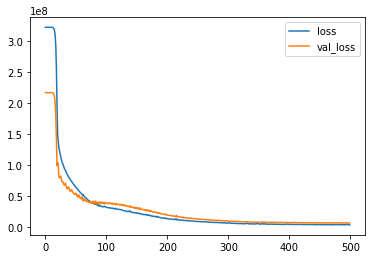

In [57]:
kayipVeri = pd.DataFrame(tf_model.history.history)
kayipVeri.plot()

In [58]:
tahmin_dizi = tf_model.predict(X_test_tf)

trainLoss = tf_model.evaluate(X_train_tf, y_train_tf, verbose = 0)
testLoss = tf_model.evaluate(X_test_tf, y_test_tf, verbose = 0)

print("Train Loss : ", trainLoss)
print("Test Loss : ", testLoss)

Train Loss :  3969495.25
Test Loss :  6917915.0


In [59]:
tf_rmse = np.sqrt(mean_squared_error(y_test_tf, tf_model.predict(X_test_tf)))
tf_mae = mean_absolute_error(y_test_tf, tf_model.predict(X_test_tf))

print("RMSE :", tf_rmse)
print("MAE :", tf_mae)

RMSE : 2630.193051479604
MAE : 1359.686094755285


In [60]:
tf_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test_tf, "Tahmin Vaka Test": tf_model.predict(X_test_tf).reshape(-1)}).sort_index()
tf_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,616.080017
2020-03-15,12,478.899658
2020-03-17,51,540.284973
2020-03-21,277,660.907837
2020-03-23,293,720.546082
...,...,...
2021-04-22,54791,56687.152344
2021-04-25,38553,34288.335938
2021-05-03,24733,27665.472656


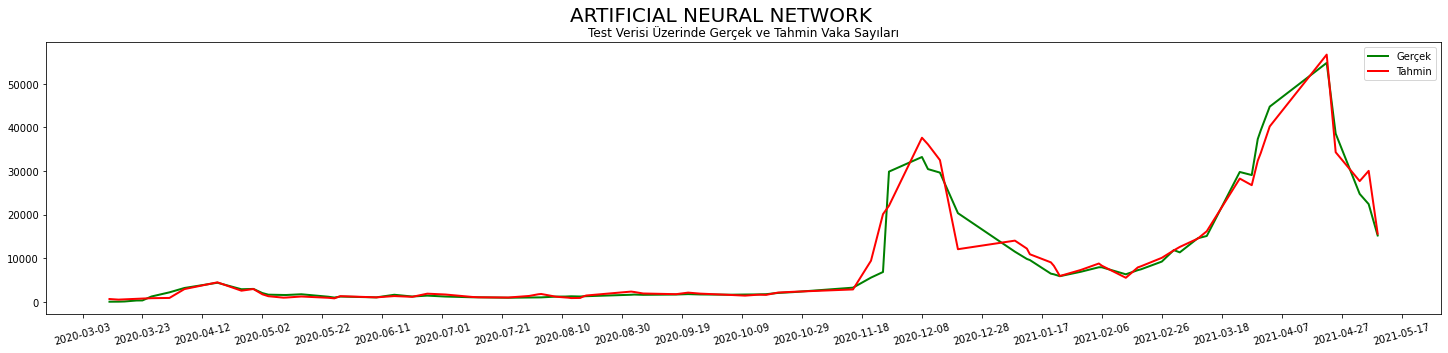

In [61]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('ARTIFICIAL NEURAL NETWORK', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(tf_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(tf_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Tensorflow.png')

### GRADIENT BOOSTING REGRESSOR

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 20,
          'learning_rate': 0.9,
          'loss': 'ls'}

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, max_depth=10, min_samples_split=20,
                          n_estimators=500)

In [64]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_model.predict(X_test)))
gbr_mae = mean_absolute_error(y_test, gbr_model.predict(X_test))

print("RMSE :", gbr_rmse)
print("MAE :", gbr_mae)

RMSE : 3393.8663033129455
MAE : 1205.6150052101664


In [65]:
gbr_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": gbr_model.predict(X_test)}).sort_index()
gbr_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,8.115844
2020-03-15,12,3.272825
2020-03-17,51,11.826440
2020-03-21,277,318.449309
2020-03-23,293,290.861222
...,...,...
2021-04-22,54791,61889.501377
2021-04-25,38553,37838.406752
2021-05-03,24733,37634.682271


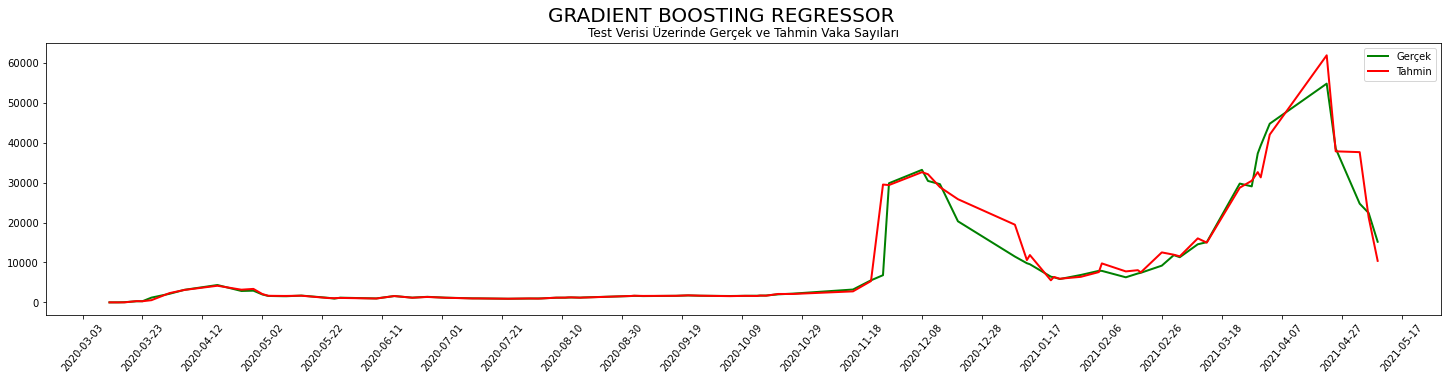

In [66]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(gbr_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(gbr_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Gradient.png')

# MODELLERİN KARŞILAŞTIRILMASI

## RMSE ve MAE Değerlerinin Karşılaştırılması

In [67]:
model_comp = pd.DataFrame({'Models': ["SARIMAX", "XGBOOST", "SKLEARN", "DESICION TREE", "GRADIENT BOOSTING", "DEEP NEURAL NETWORK"], 
                           'RMSE': [sarimax_rmse, xgb_rmse, sklearn_rmse, dt_regressor_rmse, gbr_rmse, tf_rmse],
                           'MAE': [sarimax_mae, xgb_mae, sklearn_mae, dt_regressor_mae, gbr_mae, tf_mae]})
model_comp = model_comp.sort_values(by="RMSE",axis=0, ascending = False).reset_index(drop=True)
model_comp

,Models,RMSE,MAE
0,SKLEARN,4624.933788,3204.298586
1,GRADIENT BOOSTING,3393.866303,1205.615005
2,DESICION TREE,3120.725006,1100.494118
3,DEEP NEURAL NETWORK,2630.193051,1359.686095
4,SARIMAX,1997.564663,874.730667
5,XGBOOST,1851.388294,836.051699


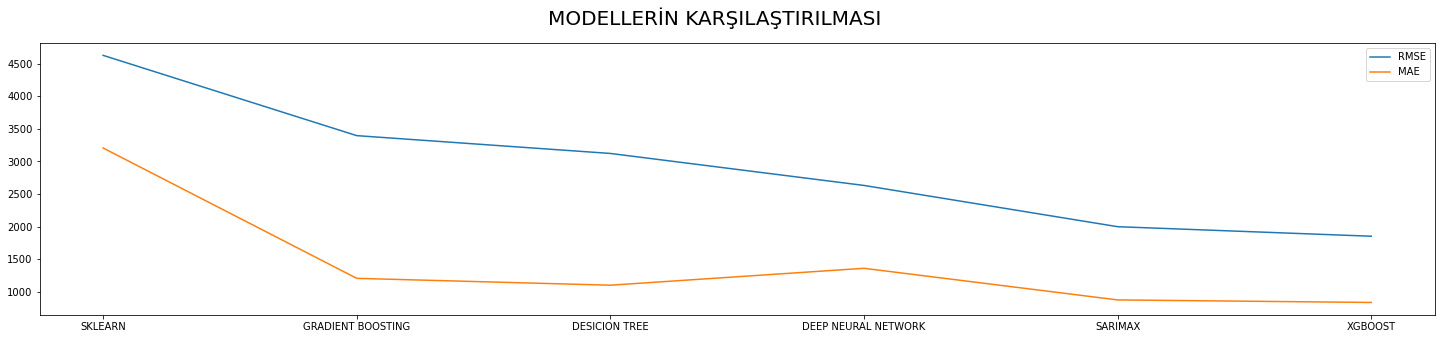

In [68]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
plt.plot(model_comp['Models'], model_comp['RMSE'], label = "RMSE")
plt.plot(model_comp['Models'], model_comp['MAE'], label = "MAE")
plt.legend()
plt.show()

## Tahminleme Karşılaştırılması

In [69]:
frames = [xgb_tahmin_df["Gerçek Vaka Test"], pred_vaka_ci["Predicted"], xgb_tahmin_df["Tahmin Vaka Test"], 
          sklearn_tahmin_df["Tahmin Vaka Test"], dt_tahmin_df["Tahmin Vaka Test"], 
          gbr_tahmin_df["Tahmin Vaka Test"], tf_tahmin_df["Tahmin Vaka Test"]]

model_comp_ = pd.concat(frames, axis=1)
model_comp_.columns = ["Gerçek Değerler", "SARIMAX", "XGBoost", "Sklearn", "Decision Tree", "Gradient Boosting", "Deep Neural Network"]
model_comp_

,Gerçek Değerler,SARIMAX,XGBoost,Sklearn,Decision Tree,Gradient Boosting,Deep Neural Network
2020-03-12,0,1.085662,81.736404,-590.729602,1.0,8.115844,616.080017
2020-03-15,12,0.383465,81.736404,-1069.196010,1.0,3.272825,478.899658
2020-03-17,51,32.783064,81.736404,-1385.820357,29.0,11.826440,540.284973
2020-03-21,277,342.693264,306.315613,-1987.257402,311.0,318.449309,660.907837
2020-03-23,293,291.787585,306.315613,-2278.763525,289.0,290.861222,720.546082
...,...,...,...,...,...,...,...
2021-04-22,54791,63291.286655,59267.566406,56142.032488,61967.0,61889.501377,56687.152344
2021-04-25,38553,39519.364242,33924.726562,40466.564234,37312.0,37838.406752,34288.335938
2021-05-03,24733,24453.543040,30402.853516,29601.736925,31891.0,37634.682271,27665.472656
2021-05-06,22388,25535.438958,20261.804688,35818.416979,20107.0,21276.220255,30021.923828


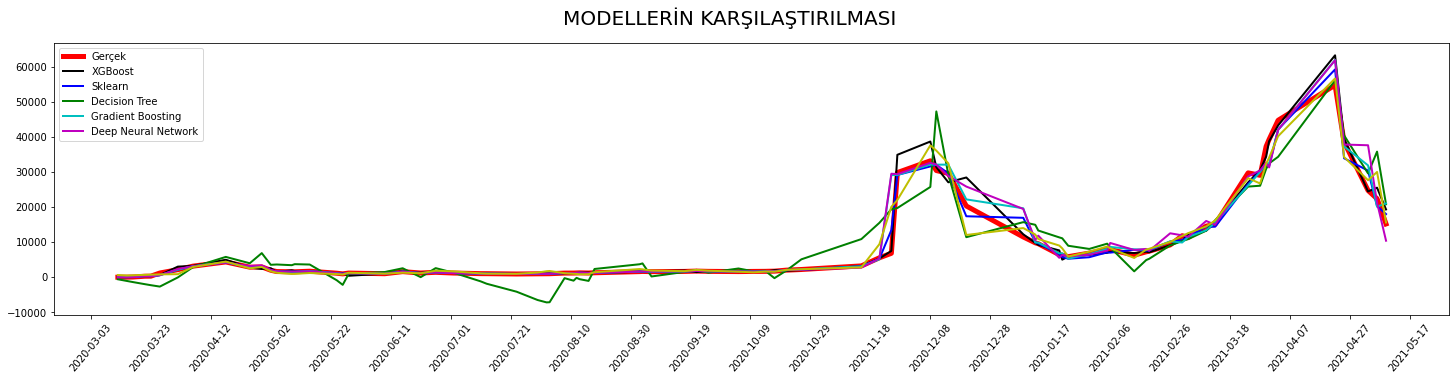

In [70]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(model_comp_['Gerçek Değerler'], lw=5, color="r")
ax.plot(model_comp_['SARIMAX'], lw=2, color="k")
ax.plot(model_comp_['XGBoost'], lw=2, color="b")
ax.plot(model_comp_['Sklearn'], lw=2, color="g")
ax.plot(model_comp_['Decision Tree'], lw=2, color="c")
ax.plot(model_comp_['Gradient Boosting'], lw=2, color="m")
ax.plot(model_comp_['Deep Neural Network'], lw=2, color="y")
ax.legend(['Gerçek','XGBoost', 'Sklearn', 'Decision Tree', 'Gradient Boosting', 'Deep Neural Network'])

| ![SARIMAX](plots/SARIMAX.png) | ![XGBoost](plots/XGBoost.png)
|:---:|:---:|

| ![Sklearn](plots\Sklearn.png) | ![DecisionTree](plots\DecisionTree.png)
|:---:|:---:|

| ![Gradient](plots\Gradient.png) | ![Tensorflow](plots\Tensorflow.png)
|:---:|:---:|